<a href="https://colab.research.google.com/github/YomnaaAshraf/ANN-project/blob/main/RFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px

In [ ]:
df_Transactions = pd.read_csv("Transactions.csv")
df_Categories = pd.read_csv("Categories.csv")

In [ ]:
df_Categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MerchantName  59 non-null     object
 1   Category      59 non-null     object
dtypes: object(2)
memory usage: 1.0+ KB


In [ ]:
df_Categories["MerchantName"].value_counts()

MerchantName
Grill Emperor               1
SoundSphere                 1
Guard Vogue                 1
Canal Mart                  1
Tabouleh Tavern             1
Pie Corner                  1
Bubble Joy                  1
Diamond Dreams              1
Gemstone Gallery            1
Oscar’s Bazaar              1
Nassif Jewels               1
Breeze Spaces               1
Federation Retail           1
TechWave                    1
Vision Vogue                1
Rainbow Electronics         1
Tie Territory               1
Gahar Goods                 1
FishNet Seafoods            1
Gabby’s Grill               1
Vincent’s Pizza             1
TravelTrend Luggage         1
Panatech                    1
Chief’s Grill               1
Beauty Blossom              1
Streamline Entertainment    1
Ezz Wellness                1
AMS Trends                  1
Grandpa’s Kitchen           1
TickTock Time               1
Threads Royale              1
City Squad Fashions         1
Cakeland                   

In [ ]:
sorted(df_Categories["MerchantName"].unique())

['AMS Trends',
 'Aroma Beans',
 'Beauty Blossom',
 'Breeze Spaces',
 'Bubble Joy',
 'Cakeland',
 'Canal Mart',
 'Chief’s Grill',
 'Cinema Egypt',
 'City Squad Fashions',
 'ClearSight Optics',
 'Date Palm Delights',
 'Diamond Dreams',
 'Ezz Wellness',
 'Family Grocers',
 'Federation Retail',
 'FishNet Seafoods',
 'FryBird',
 'Gabby’s Grill',
 'Gahar Goods',
 'Gemstone Gallery',
 'Gizmo Genius',
 'Global Media Hub',
 'Grandpa’s Kitchen',
 'Grill Emperor',
 'Guard Vogue',
 'Herbal Wellness',
 'Lola Market',
 'Lucky Finds',
 'Mamma Mia',
 'Marketplace Central',
 'Morad Crafts',
 'Nassif Jewels',
 'Nuts & Seeds Co.',
 'Oscar’s Bazaar',
 'Panatech',
 'Peppers Diner',
 'Pie Corner',
 'Playland',
 'Quick Stop',
 'Rainbow Electronics',
 'Retro Rewind',
 'Smokehouse Grill',
 'SoundSphere',
 'Streamline Entertainment',
 'Sweets & Fizz',
 'Tabouleh Tavern',
 'TechWave',
 'Threads Royale',
 'TickTock Time',
 'Tie Territory',
 'TouchTech Innovations',
 'TravelTrend Luggage',
 'Urban Rides',
 'Vincen

In [ ]:
df_Categories["Category"].value_counts()

Category
F&B                16
Fashion             8
Electronics         8
Health & Beauty     6
Grocery             4
F_B                 4
fashion             3
Entertainment       3
Groceri             2
Jewerlies           2
Transportaion       1
Car Services        1
Optics              1
Name: count, dtype: int64

In [ ]:
sorted(df_Categories["Category"].unique())

['Car Services',
 'Electronics',
 'Entertainment',
 'F&B',
 'F_B',
 'Fashion',
 'Groceri',
 'Grocery',
 'Health & Beauty',
 'Jewerlies',
 'Optics',
 'Transportaion',
 'fashion']

In [ ]:
def fix_category(r):
    if r in ["F&B" , "F_B"] :
        return "F&B"
    elif r in ["Grocery", "Groceri"] :
        return "Grocery"
    elif r in ["fashion", "Fashion"]  :
        return 'Fashion'
    else :
        return r


In [ ]:
df_Categories["Category"] = df_Categories["Category"].apply(fix_category)

In [ ]:
df_Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43929 entries, 0 to 43928
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   CustomerID                         43929 non-null  int64  
 1   MerchantName                       43929 non-null  object 
 2   TransactionRank                    43929 non-null  int64  
 3   TransactionRedeemedPoints          43929 non-null  int64  
 4   TransactionValue                   43929 non-null  float64
 5   TransactionFrom(days)              43929 non-null  int64  
 6   CustomerLastTransactionFrom(days)  43929 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 2.3+ MB


In [ ]:
df_Transactions.duplicated().sum()

0

In [ ]:
df_Transactions["MerchantName"].value_counts()

MerchantName
Marketplace Central         19389
Family Grocers               6920
Zest Market                  4269
Grill Emperor                3392
Threads Royale               2972
Herbal Wellness              1478
Cakeland                     1302
Aroma Beans                  1012
Smokehouse Grill              910
Nuts & Seeds Co.              554
City Squad Fashions           328
Peppers Diner                 158
Urban Rides                   147
Quick Stop                    143
Gizmo Genius                  137
Rainbow Electronics           104
Mamma Mia                      88
FryBird                        47
Canal Mart                     46
TouchTech Innovations          46
Zanobia Textiles               45
Retro Rewind                   41
Cinema Egypt                   38
Sweets & Fizz                  37
TechWave                       35
Lola Market                    31
TickTock Time                  27
Playland                       20
Pie Corner                     19
G

In [ ]:
sorted(df_Transactions["MerchantName"].unique())

['AMS Trends',
 'Aroma Beans',
 'Beauty Blossom',
 'Breeze Spaces',
 'Bubble Joy',
 'Cakeland',
 'Canal Mart',
 'Chief’s Grill',
 'Cinema Egypt',
 'City Squad Fashions',
 'ClearSight Optics',
 'Date Palm Delights',
 'Diamond Dreams',
 'Ezz Wellness',
 'Family Grocers',
 'Federation Retail',
 'FishNet Seafoods',
 'FryBird',
 'Gabby’s Grill',
 'Gahar Goods',
 'Gemstone Gallery',
 'Gizmo Genius',
 'Global Media Hub',
 'Grandpa’s Kitchen',
 'Grill Emperor',
 'Guard Vogue',
 'Herbal Wellness',
 'Lola Market',
 'Lucky Finds',
 'Mamma Mia',
 'Marketplace Central',
 'Morad Crafts',
 'Nassif Jewels',
 'Nuts & Seeds Co.',
 'Oscar’s Bazaar',
 'Panatech',
 'Peppers Diner',
 'Pie Corner',
 'Playland',
 'Quick Stop',
 'Rainbow Electronics',
 'Retro Rewind',
 'Smokehouse Grill',
 'SoundSphere',
 'Streamline Entertainment',
 'Sweets & Fizz',
 'Tabouleh Tavern',
 'TechWave',
 'Threads Royale',
 'TickTock Time',
 'Tie Territory',
 'TouchTech Innovations',
 'TravelTrend Luggage',
 'Urban Rides',
 'Vincen

In [ ]:
df_Transactions.columns

Index(['CustomerID', 'MerchantName', 'TransactionRank',
       'TransactionRedeemedPoints', 'TransactionValue',
       'TransactionFrom(days)', 'CustomerLastTransactionFrom(days)'],
      dtype='object')

In [ ]:
df_Transactions["TransactionRank"].describe()

count    43929.000000
mean         1.269207
std          0.784751
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         17.000000
Name: TransactionRank, dtype: float64

In [ ]:
df_Transactions["TransactionRedeemedPoints"].describe()

count     43929.00000
mean       3352.54513
std        5916.63287
min           0.00000
25%        1220.00000
50%        1890.00000
75%        3118.00000
max      263800.00000
Name: TransactionRedeemedPoints, dtype: float64

In [ ]:
df_Transactions[df_Transactions["TransactionRedeemedPoints"] == 0]

,CustomerID,MerchantName,TransactionRank,TransactionRedeemedPoints,TransactionValue,TransactionFrom(days),CustomerLastTransactionFrom(days)
9004,7159,Family Grocers,2,0,0.0,345,345
9086,7230,Family Grocers,1,0,0.0,352,351
9087,7230,Family Grocers,2,0,0.0,352,351
9088,7230,Family Grocers,3,0,0.0,352,351
9089,7230,Family Grocers,4,0,0.0,352,351
9090,7230,Marketplace Central,1,0,0.0,352,351
9091,7230,Marketplace Central,2,0,0.0,351,351
9092,7230,Marketplace Central,3,0,0.0,351,351
10688,8497,Family Grocers,1,0,0.0,351,179
10689,8497,Family Grocers,2,0,0.0,350,179


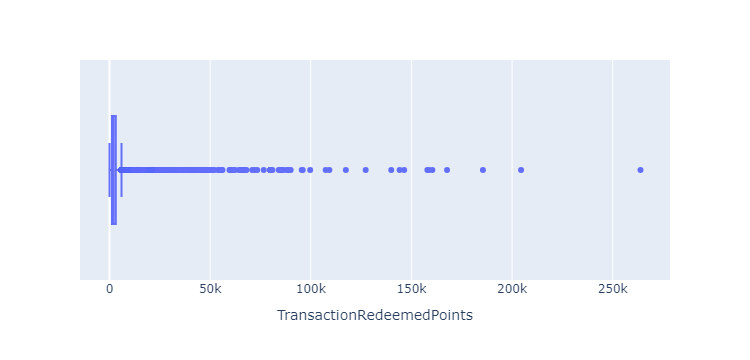

In [ ]:
px.box(data_frame=df_Transactions , x = "TransactionRedeemedPoints")

In [ ]:
idx_drop = df_Transactions[(df_Transactions["TransactionRedeemedPoints"] < 20 )  | (df_Transactions["TransactionRedeemedPoints"] > 100000)].index

In [ ]:
df_Transactions.drop(idx_drop , axis = 0 , inplace = True)

In [ ]:
df_Transactions

,CustomerID,MerchantName,TransactionRank,TransactionRedeemedPoints,TransactionValue,TransactionFrom(days),CustomerLastTransactionFrom(days)
0,1,Grill Emperor,1,4427,442.7,281,281
1,2,Threads Royale,1,2490,249.0,34,34
2,3,Cakeland,1,3000,300.0,236,236
3,4,Threads Royale,1,1620,162.0,320,320
4,5,Quick Stop,1,700,70.0,407,407
...,...,...,...,...,...,...,...
43924,33519,Zest Market,1,1320,132.0,256,256
43925,33520,Zest Market,1,2100,210.0,13,13
43926,33521,Marketplace Central,1,2180,218.0,225,55
43927,33521,Marketplace Central,2,1540,154.0,55,55


In [ ]:
df_Transactions.reset_index(drop = True , inplace = True)

In [ ]:
df_Transactions["TransactionFrom(days)"].describe()

count    43758.000000
mean       185.449746
std        122.084002
min          1.000000
25%         62.000000
50%        203.000000
75%        271.000000
max        698.000000
Name: TransactionFrom(days), dtype: float64

In [ ]:
df_Transactions["CustomerLastTransactionFrom(days)"].describe()

count    43758.000000
mean       144.254879
std        114.900019
min          1.000000
25%         34.000000
50%        116.000000
75%        252.000000
max        682.000000
Name: CustomerLastTransactionFrom(days), dtype: float64

In [ ]:
df_Transactions.columns

Index(['CustomerID', 'MerchantName', 'TransactionRank',
       'TransactionRedeemedPoints', 'TransactionValue',
       'TransactionFrom(days)', 'CustomerLastTransactionFrom(days)'],
      dtype='object')

In [ ]:
df = pd.merge(left=df_Categories , right=df_Transactions , on = "MerchantName")

In [ ]:
df

,MerchantName,Category,CustomerID,TransactionRank,TransactionRedeemedPoints,TransactionValue,TransactionFrom(days),CustomerLastTransactionFrom(days)
0,Grill Emperor,F&B,1,1,4427,442.7,281,281
1,Grill Emperor,F&B,19,1,3540,354.0,272,102
2,Grill Emperor,F&B,34,1,1760,176.0,421,421
3,Grill Emperor,F&B,66,1,740,74.0,6,6
4,Grill Emperor,F&B,67,1,1500,150.0,291,291
...,...,...,...,...,...,...,...,...
43753,AMS Trends,Fashion,26475,2,8500,850.0,368,368
43754,AMS Trends,Fashion,27078,1,1980,198.0,558,34
43755,AMS Trends,Fashion,27420,1,2400,240.0,413,413
43756,Zed Adventures,Entertainment,29110,1,20,2.0,2,2


### What is the average TransactionValue for each Category?

In [ ]:
df.groupby("Category")["TransactionValue"].mean().sort_values(ascending=False)

Category
Jewerlies          4529.705882
Optics             1659.000000
Electronics        1451.037918
Car Services       1087.857143
Entertainment       661.380556
Fashion             455.852496
Transportaion       365.940411
Grocery             316.145310
F&B                 299.261069
Health & Beauty     257.397417
Name: TransactionValue, dtype: float64

### How many unique CustomerIDs have made transactions in each Category , sort them descending?

In [ ]:
df.groupby("Category")["CustomerID"].nunique()

Category
Car Services          18
Electronics          224
Entertainment         29
F&B                 6100
Fashion             2914
Grocery            24570
Health & Beauty     1187
Jewerlies             10
Optics                10
Transportaion        138
Name: CustomerID, dtype: int64

### What is the total TransactionRedeemedPoints for each MerchantName, get the top 10 only?

In [ ]:
df.groupby("MerchantName")["TransactionRedeemedPoints"].sum().nlargest(10)

MerchantName
Marketplace Central    62718215
Family Grocers         18909356
Zest Market            15119451
Threads Royale         12819936
Grill Emperor           8663588
Smokehouse Grill        4335701
Herbal Wellness         3561611
Aroma Beans             2900366
Cakeland                2870804
City Squad Fashions     1932300
Name: TransactionRedeemedPoints, dtype: int64

### Which MerchantName has the highest average TransactionValue?

In [ ]:
df.groupby("MerchantName")["TransactionValue"].mean().nlargest(1)

MerchantName
Diamond Dreams    5507.5
Name: TransactionValue, dtype: float64

### What is the redemption factor, specifically the mapping from Redeemed Points to corresponding Redeemed value?

In [ ]:
df["TransactionValue"].iloc[0] / df["TransactionRedeemedPoints"].iloc[0]

0.09999999999999999

In [ ]:
df["Category"].value_counts()

Category
Grocery            30680
F&B                 7724
Fashion             3345
Health & Beauty     1510
Electronics          269
Transportaion        146
Entertainment         36
Car Services          21
Jewerlies             17
Optics                10
Name: count, dtype: int64

In [ ]:
def fix_Category(r):
    if r in ["Entertainment" , "Car Services" , "Jewerlies" , "Optics"]:
        return "Other"
    else :
        return r

In [ ]:
df["Category"] = df["Category"].apply(fix_Category)

In [ ]:
df.columns

Index(['MerchantName', 'Category', 'CustomerID', 'TransactionRank',
       'TransactionRedeemedPoints', 'TransactionValue',
       'TransactionFrom(days)', 'CustomerLastTransactionFrom(days)'],
      dtype='object')

In [ ]:
df["TransactionFrom(days)"]

0        281
1        272
2        421
3          6
4        291
        ... 
43753    368
43754    558
43755    413
43756      2
43757      2
Name: TransactionFrom(days), Length: 43758, dtype: int64

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

In [ ]:
disc = KBinsDiscretizer(n_bins=30 , strategy="uniform" , encode="ordinal")

In [ ]:
df["TransactionFrom(days)"] = disc.fit_transform(df[["TransactionFrom(days)"]])

C:\Users\bu39\AppData\Local\anaconda3\envs\ML\lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning:

In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.



In [ ]:
df["TransactionFrom(days)"] = df["TransactionFrom(days)"] + 1

In [ ]:
df["TransactionFrom(days)"] = 1 / df["TransactionFrom(days)"]

In [ ]:
df["TransactionFrom(days)"]

0        0.076923
1        0.083333
2        0.052632
3        1.000000
4        0.076923
           ...   
43753    0.062500
43754    0.041667
43755    0.055556
43756    1.000000
43757    1.000000
Name: TransactionFrom(days), Length: 43758, dtype: float64

In [ ]:
df["TransactionFrom(days)"] = df["TransactionFrom(days)"] * 100

In [ ]:
pivot_frequency = pd.pivot_table(data=df , index = 'CustomerID' , columns="Category" , values="TransactionRank" , aggfunc='count').add_suffix("_frequency")

In [ ]:
pivot_frequency

Category,Electronics_frequency,F&B_frequency,Fashion_frequency,Grocery_frequency,Health & Beauty_frequency,Other_frequency,Transportaion_frequency
CustomerID,,,,,,,
1,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,1.0,NaN,NaN,NaN,NaN
3,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,1.0,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
33517,NaN,NaN,NaN,3.0,NaN,NaN,NaN
33518,NaN,1.0,NaN,NaN,NaN,NaN,NaN
33519,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [ ]:
df.columns

Index(['MerchantName', 'Category', 'CustomerID', 'TransactionRank',
       'TransactionRedeemedPoints', 'TransactionValue',
       'TransactionFrom(days)', 'CustomerLastTransactionFrom(days)'],
      dtype='object')

In [ ]:
pivot_rescency = pd.pivot_table(data=df , index = 'CustomerID' , columns="Category" , values="TransactionFrom(days)" , aggfunc='max').add_suffix("_rescency")

In [ ]:
pivot_rescency

Category,Electronics_rescency,F&B_rescency,Fashion_rescency,Grocery_rescency,Health & Beauty_rescency,Other_rescency,Transportaion_rescency
CustomerID,,,,,,,
1,NaN,7.692308,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,50.000000,NaN,NaN,NaN,NaN
3,NaN,9.090909,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,7.142857,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,5.555556,NaN,NaN,NaN
...,...,...,...,...,...,...,...
33517,NaN,NaN,NaN,20.000000,NaN,NaN,NaN
33518,NaN,9.090909,NaN,NaN,NaN,NaN,NaN
33519,NaN,NaN,NaN,9.090909,NaN,NaN,NaN


In [ ]:
pivot_monetary = pd.pivot_table(data=df , index = 'CustomerID' , columns="Category" , values="TransactionValue" , aggfunc='sum').add_suffix("_monetary")

In [ ]:
rfm_pivot = pd.concat([pivot_frequency , pivot_monetary , pivot_rescency] , axis = 1 )

In [ ]:
rfm_pivot.fillna(0 , inplace = True)

In [ ]:
rfm_pivot

Category,Electronics_frequency,F&B_frequency,Fashion_frequency,Grocery_frequency,Health & Beauty_frequency,Other_frequency,Transportaion_frequency,Electronics_monetary,F&B_monetary,Fashion_monetary,...,Health & Beauty_monetary,Other_monetary,Transportaion_monetary,Electronics_rescency,F&B_rescency,Fashion_rescency,Grocery_rescency,Health & Beauty_rescency,Other_rescency,Transportaion_rescency
CustomerID,,,,,,,,,,,,,,,,,,,,,
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,442.7,0.0,...,0.0,0.0,0.0,0.0,7.692308,0.000000,0.000000,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,249.0,...,0.0,0.0,0.0,0.0,0.000000,50.000000,0.000000,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,300.0,0.0,...,0.0,0.0,0.0,0.0,9.090909,0.000000,0.000000,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,162.0,...,0.0,0.0,0.0,0.0,0.000000,7.142857,0.000000,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,5.555556,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33517,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,20.000000,0.0,0.0,0.0
33518,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0,0.0,...,0.0,0.0,0.0,0.0,9.090909,0.000000,0.000000,0.0,0.0,0.0
33519,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,9.090909,0.0,0.0,0.0


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import DBSCAN

In [ ]:
steps = []
steps.append(("Scaler" , StandardScaler()))
steps.append(("Model" , DBSCAN(eps=3.25 , min_samples=250 , n_jobs = -1)))
pipeline = Pipeline(steps = steps)

In [ ]:
pipeline.fit(rfm_pivot)

Pipeline(steps=[('Scaler', StandardScaler()),
                ('Model', DBSCAN(eps=3.25, min_samples=250, n_jobs=-1))])

In [ ]:
np.unique(pipeline["Model"].labels_)

array([-1,  0,  1,  2,  3], dtype=int64)

In [ ]:
rfm_pivot["Cluster"] = pipeline["Model"].labels_

In [ ]:
dict_map = {

    -1 : 5 , 0 :1 , 1:2,2:3,3:4
}

In [ ]:
rfm_pivot["Cluster"] = rfm_pivot["Cluster"].map(dict_map)

In [ ]:
rfm_pivot

Category,Electronics_frequency,F&B_frequency,Fashion_frequency,Grocery_frequency,Health & Beauty_frequency,Other_frequency,Transportaion_frequency,Electronics_monetary,F&B_monetary,Fashion_monetary,...,Other_monetary,Transportaion_monetary,Electronics_rescency,F&B_rescency,Fashion_rescency,Grocery_rescency,Health & Beauty_rescency,Other_rescency,Transportaion_rescency,Cluster
CustomerID,,,,,,,,,,,,,,,,,,,,,
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,442.7,0.0,...,0.0,0.0,0.0,7.692308,0.000000,0.000000,0.0,0.0,0.0,1
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,249.0,...,0.0,0.0,0.0,0.000000,50.000000,0.000000,0.0,0.0,0.0,1
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,300.0,0.0,...,0.0,0.0,0.0,9.090909,0.000000,0.000000,0.0,0.0,0.0,1
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,162.0,...,0.0,0.0,0.0,0.000000,7.142857,0.000000,0.0,0.0,0.0,1
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,5.555556,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33517,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,20.000000,0.0,0.0,0.0,1
33518,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0,0.0,...,0.0,0.0,0.0,9.090909,0.000000,0.000000,0.0,0.0,0.0,1
33519,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,9.090909,0.0,0.0,0.0,1


In [ ]:
rfm_pivot

Category,Electronics_frequency,F&B_frequency,Fashion_frequency,Grocery_frequency,Health & Beauty_frequency,Other_frequency,Transportaion_frequency,Electronics_monetary,F&B_monetary,Fashion_monetary,...,Other_monetary,Transportaion_monetary,Electronics_rescency,F&B_rescency,Fashion_rescency,Grocery_rescency,Health & Beauty_rescency,Other_rescency,Transportaion_rescency,Cluster
CustomerID,,,,,,,,,,,,,,,,,,,,,
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,442.7,0.0,...,0.0,0.0,0.0,7.692308,0.000000,0.000000,0.0,0.0,0.0,1
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,249.0,...,0.0,0.0,0.0,0.000000,50.000000,0.000000,0.0,0.0,0.0,1
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,300.0,0.0,...,0.0,0.0,0.0,9.090909,0.000000,0.000000,0.0,0.0,0.0,1
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,162.0,...,0.0,0.0,0.0,0.000000,7.142857,0.000000,0.0,0.0,0.0,1
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,5.555556,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33517,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,20.000000,0.0,0.0,0.0,1
33518,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0,0.0,...,0.0,0.0,0.0,9.090909,0.000000,0.000000,0.0,0.0,0.0,1
33519,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,9.090909,0.0,0.0,0.0,1


In [ ]:
def get_cluster_monerary(cluster):
    df_cluster = rfm_pivot[rfm_pivot["Cluster"] ==cluster ]
    df_categories_mon = pd.DataFrame()
    for col in df_cluster.columns :
        if col.split("_")[-1] == "monetary" :
            df_categories_mon.at[0,col] = df_cluster[col].sum()
    df_categories_mon = df_categories_mon.transpose().reset_index().rename(columns={"index" :"Category",0 : "Value"})
    fig = px.histogram(data_frame=df_categories_mon , x = "Category" , y = "Value" , text_auto=True)
    fig.update_xaxes(categoryorder = "total descending")
    fig.show()


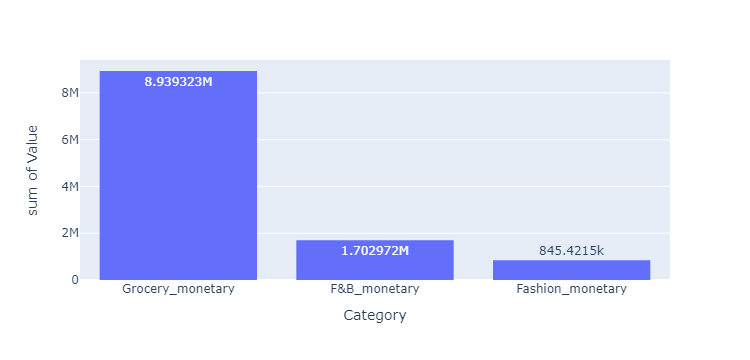

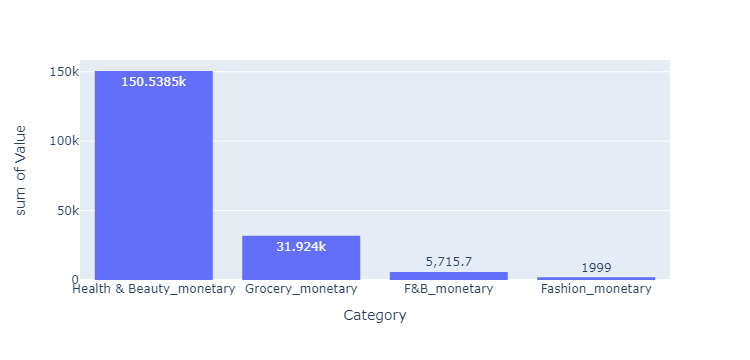

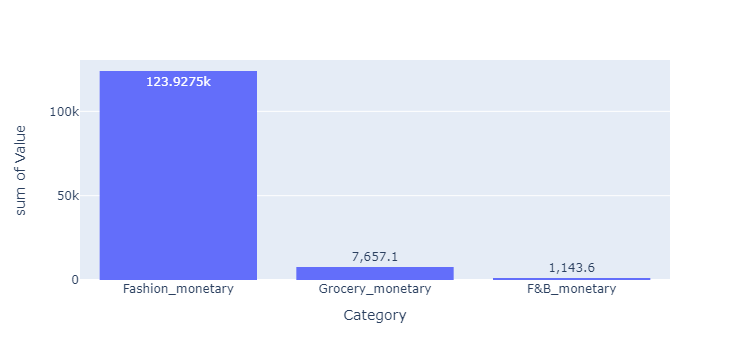

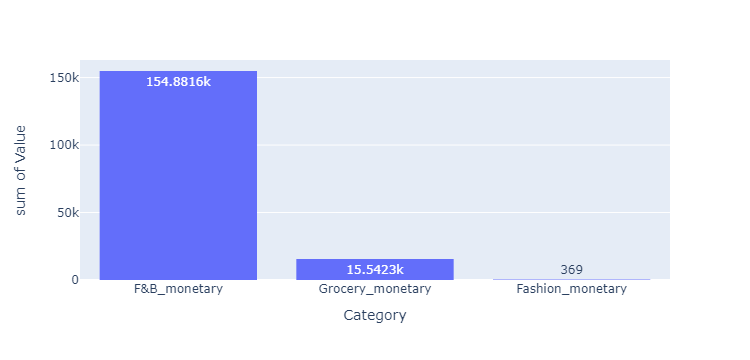

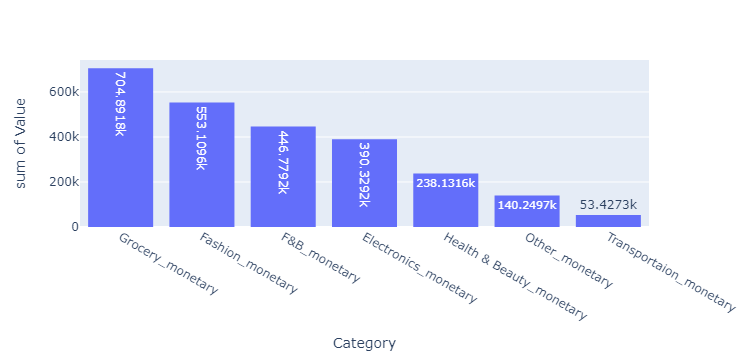

In [ ]:
for cluster in rfm_pivot["Cluster"].unique():
    get_cluster_monerary(cluster)

In [ ]:
rfm_pivot.reset_index(inplace = True)

In [ ]:
df = pd.merge(left = rfm_pivot[["CustomerID" , "Cluster"]] , right=df , on = "CustomerID")

In [ ]:
df[df["CustomerID"] == 7010]["Cluster"].unique()[0]

2

In [ ]:
def get_recommendations(user , num_of_recom):
    cluster = df[df["CustomerID"] == user]["Cluster"].unique()[0]
    df_cluster = df[df["Cluster"] == cluster]
    Top_Merchant_index = df_cluster.groupby("MerchantName")["TransactionValue"].sum().nlargest(num_of_recom).index
    for index , mer in enumerate(Top_Merchant_index) :
        print(f"The Recommended Merchant number {index} is {mer}")



In [ ]:
df.to_csv("df_Clustered.csv" , index = False)

In [ ]:
%%writefile app.py
import pandas as pd
import numpy as np
import streamlit as st
import sklearn


df = pd.read_csv("df_Clustered.csv")

def get_recommendations(user , num_of_recom):
    try:
        cluster = df[df["CustomerID"] == int(user)]["Cluster"].unique()[0]
        df_cluster = df[df["Cluster"] == cluster]
        Top_Merchant_index = df_cluster.groupby("MerchantName")["TransactionValue"].sum().nlargest(num_of_recom).index
        for index , mer in enumerate(Top_Merchant_index) :
            st.text(f"The Recommended Merchant number {index} is {mer}")
    except:
        st.text(f"The User number {user} is not exist")

def main():
    st.title("RFM Recommendations")
    user = st.text_input("User ID")
    num_of_recom = st.selectbox("num of recommendations" , list(range(1,10)))
    if st.button("Recommend"):
        get_recommendations(user , num_of_recom)

main()

Writing app.py
